## Introduction

In this section, I will be using various clustering algorithms to cluster data from the National Survey on Drug Use and Health (NSDUH) performed by the Substance Abuse and Mental Health Services Administration (SAMHSA) in 2021. This survey is conducted each year and provides information on drug usage and mental health on tens of thousands of Americans, giving insights into the annual trends in the usage of illicit substances and the state of mental health. 

Throughout this project, my goal has been to identify a link between the usage of cannabis and psychosis. With these clustering algorithms, I hope to identify a link between the usage of cannabis and mental health outcomes. While the data includes very detailed information on drug usage, mental illness information is limited due to the sensitive nature of the data. We will use the variable `smipppy`, (Probability of Serious Mental Illness in Past Year) as a proxy for psychosis. We will assess how well the clusters based on drug usage data align with the variable `smipppy` to continue working to identify a link between cannabis usage and psychosis.

## Theory
### K-Means Clustering

### DBSCAN

### Hierarchical Clustering

## Methods

Now that we have a strong theoretical understanding of each of these clustering algorithms, let's apply them to our data in order to explore the link between cannabis usage and psychosis (using our proxy, `smipppy`).

#### Data Selection

We will remove the target variable, `smipppy`, from the dataset. We will use it again at the end to assess the performance of our clustering algorithms.

In [12]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
nsduh = pd.read_csv('../../data/clean_data/nsduh_2021.csv')

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_16402/3212366654.py:8: DtypeWarning: Columns (5,11,57,58,60,501,513,514,515,516,517,519,520,521,522,523,541,546,550,551,552,553,563,569,570,571,856,857,858,859,860,861,862,863,864,865,866,867,868,1056,1057,1058,1061,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1250,1251,1252,

#### Feature Selection

We will use the data that directly relates to cannabis usage for our clustering algorithms, shown in the code below.

In [38]:
# Select all the variables that are related to marijuana
nsduh_mj = nsduh[['mjage', 'mjmfu', 'mjyrtot', 'mrbstway', 'mrdaypyr', 'mrdaypwk', 'MR30EST']]
nsduh_mj = nsduh_mj.dropna()

### K-Means Clustering

We'll begin with k-means clustering, using the elbow method to determine the optimal number of clusters.

In [64]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

# K means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Make dummy variables for the categorical variables
nsduh_mj_dummies = pd.get_dummies(nsduh_mj)

# Standardize the data
scaler = StandardScaler()
scaled_nsduh_mj = scaler.fit_transform(nsduh_mj_dummies)

# Fit the model
kmeans_data = {}
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=812, n_init=10, max_iter=300, init='k-means++')
    kmeans.fit(scaled_nsduh_mj)
    kmeans_data[i] = kmeans.inertia_, silhouette_score(scaled_nsduh_mj, kmeans.labels_)

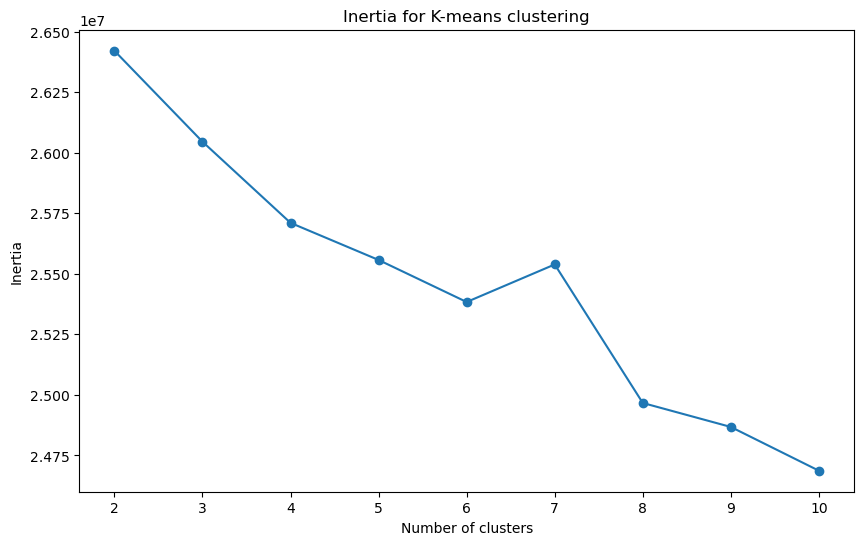

Text(0.5, 1.0, 'Silhouette score for K-means clustering')

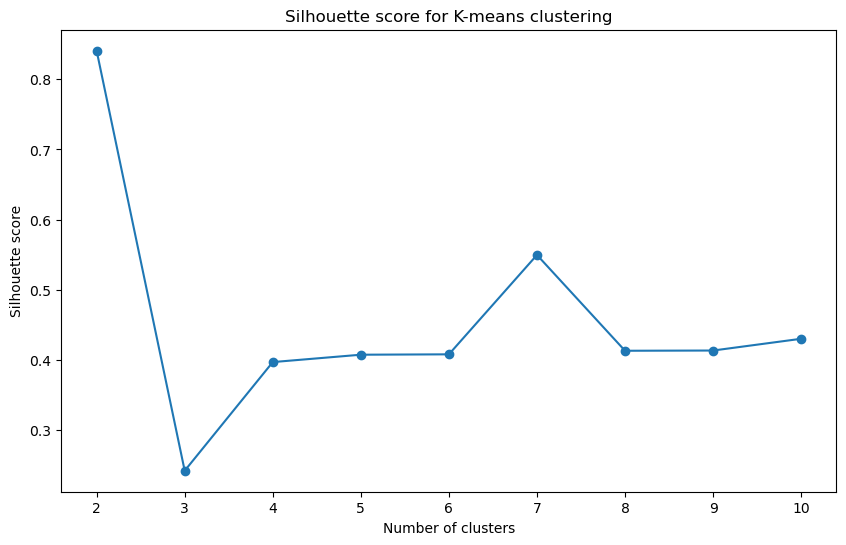

In [65]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(list(kmeans_data.keys()), [x[0] for x in kmeans_data.values()], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for K-means clustering')
plt.show()

# Plot the silhouette score
plt.figure(figsize=(10, 6))
plt.plot(list(kmeans_data.keys()), [x[1] for x in kmeans_data.values()], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for K-means clustering')

Based on the elbow method, we will use 4 clusters for our k-means clustering algorithm.

### DBSCAN

Now, we will use DBSCAN to cluster our data. We will use the elbow method to determine the optimal value for epsilon.

In [74]:
# DSBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Find the best epsilon
silhouette_scores_dbscan = []
for epsilon in tqdm(range(2, 32, 2)):
    dbscan = DBSCAN(eps=epsilon)
    dbscan.fit(scaled_nsduh_mj)
    sil_score = silhouette_score(scaled_nsduh_mj, dbscan.labels_)
    print(f'For epsilon = {epsilon}, the silhouette score is {sil_score}')
    silhouette_scores_dbscan.append(sil_score)

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [02:16<31:46, 136.15s/it]

For epsilon = 2, the silhouette score is 0.8861737944137853


 13%|█▎        | 2/15 [04:21<28:07, 129.84s/it]

For epsilon = 4, the silhouette score is 0.8884006138142241


 20%|██        | 3/15 [06:30<25:53, 129.49s/it]

For epsilon = 6, the silhouette score is 0.8394865427902991


 27%|██▋       | 4/15 [08:38<23:35, 128.72s/it]

For epsilon = 8, the silhouette score is 0.7149369936250667


 33%|███▎      | 5/15 [11:00<22:16, 133.67s/it]

For epsilon = 10, the silhouette score is 0.6069983435550532


 40%|████      | 6/15 [13:29<20:49, 138.88s/it]

For epsilon = 12, the silhouette score is 0.6231827159075807


 47%|████▋     | 7/15 [15:58<18:58, 142.28s/it]

For epsilon = 14, the silhouette score is 0.6136621554596615


 53%|█████▎    | 8/15 [18:31<16:59, 145.65s/it]

For epsilon = 16, the silhouette score is 0.6205826525062849


 60%|██████    | 9/15 [21:09<14:56, 149.39s/it]

For epsilon = 18, the silhouette score is 0.6195476462606186


 67%|██████▋   | 10/15 [23:49<12:42, 152.58s/it]

For epsilon = 20, the silhouette score is 0.6244295931932764


 73%|███████▎  | 11/15 [26:28<10:18, 154.65s/it]

For epsilon = 22, the silhouette score is 0.637113230934701


 80%|████████  | 12/15 [29:09<07:50, 156.72s/it]

For epsilon = 24, the silhouette score is 0.6504957676319845


 87%|████████▋ | 13/15 [31:54<05:18, 159.21s/it]

For epsilon = 26, the silhouette score is 0.6578042070846629


 93%|█████████▎| 14/15 [34:42<02:41, 161.77s/it]

For epsilon = 28, the silhouette score is 0.6857636262183029


100%|██████████| 15/15 [37:30<00:00, 150.00s/it]

For epsilon = 30, the silhouette score is 0.6833402038536887


Text(0.5, 1.0, 'Silhouette Score for DBSCAN Clustering on NSDUH Marijuana Data')

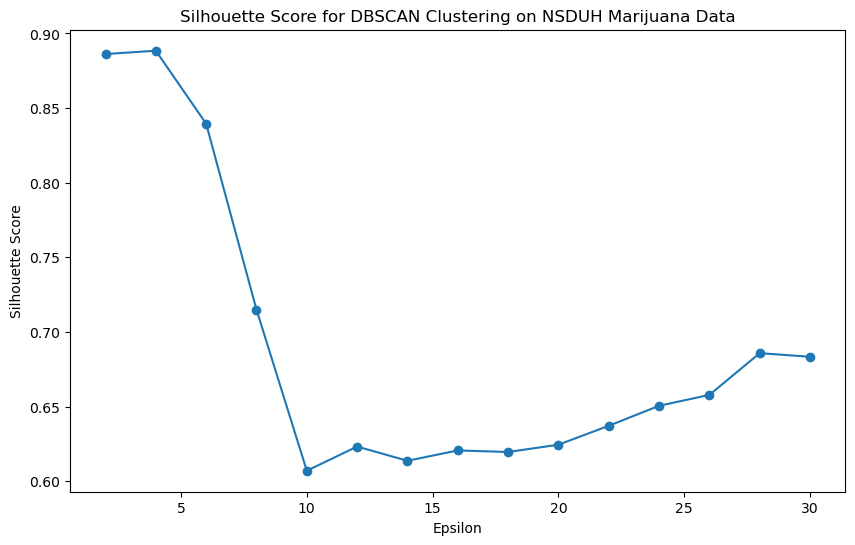

In [75]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
epsilons = [x for x in range(2, 32, 2)]
plt.plot(epsilons, silhouette_scores_dbscan, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for DBSCAN Clustering on NSDUH Marijuana Data')

Text(0.5, 0, 'Age')

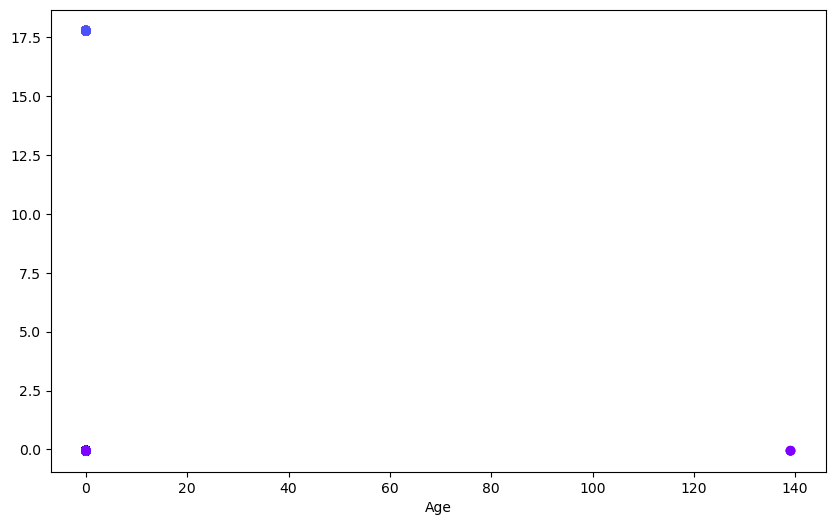

In [76]:
# Plot the clusters
dbscan = DBSCAN(eps=4)
dbscan.fit(scaled_nsduh_mj)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_nsduh_mj[:, 0], scaled_nsduh_mj[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Age')

### Hierarchical Clustering

Finally, we will use hierarchical clustering to cluster our data. We will use the dendrogram to determine the optimal number of clusters.

In [58]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Find the best number of clusters
silhouette_scores = []
for num_cluster in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=num_cluster)
    agg.fit(scaled_nsduh_mj)
    silhouette_scores.append(silhouette_score(scaled_nsduh_mj, agg.labels_))

Text(0.5, 1.0, 'Silhouette Score for Hierarchical Clustering on NSDUH Marijuana Data')

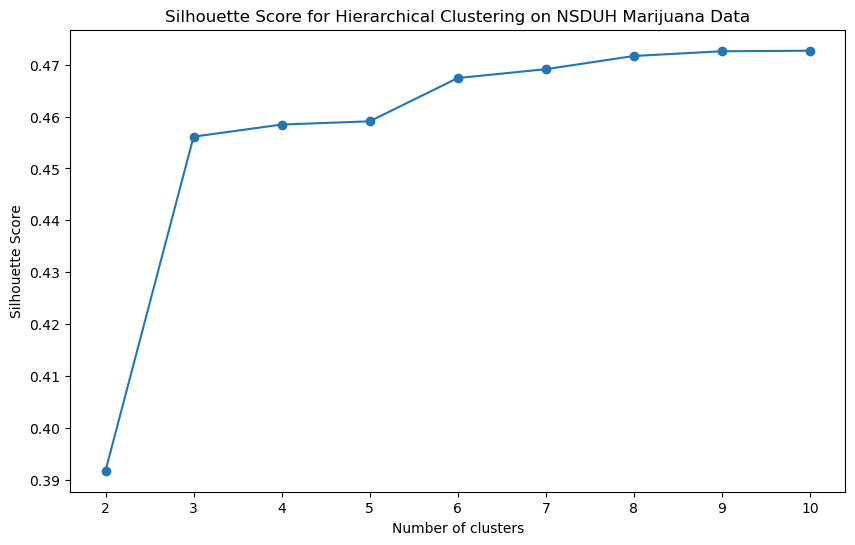

In [59]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering on NSDUH Marijuana Data')